<a href="https://colab.research.google.com/github/matheuslbrito/Estudos-Quants/blob/main/An%C3%A1liseDados_Covid19_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados da Covid19 no estado de São Paulo/Brasil 

Este notebook possui o objetivo de extrairmos os dados públicos disponibilizados pelo governo de São Paulo e entendermos melhor como é esta amostra de pacientes.

Fonte: https://www.saopaulo.sp.gov.br/planosp/simi/dados-abertos/

## Obtenção dos dados

### Instalação de bibliotecas

In [1]:
import urllib
import os
import zipfile
import io

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### Requisição no site

In [6]:
# identificar qual é o diretório definido
path = os.getcwd()

# a url em questão esta atrelada a data de extração, importante ficar atento para futuras extrações
url = 'https://www.saopaulo.sp.gov.br/wp-content/uploads/2023/04/20230424_Casos_e_obitos_ESP-1.zip'

# faz a solicitação HTTP e obtém a resposta
# como o arquivo é pesado incluí um timeout diferente do default
response = urllib.request.urlopen(url, timeout = 120)

# conferir o status da solicitação
# Status: 200 -> Extração funcionou
print(response.status)

# lê o conteúdo da resposta como uma sequência de bytes
zip_content = response.read()

# cria um objeto ZipFile a partir do conteúdo do arquivo zip
with zipfile.ZipFile(io.BytesIO(zip_content)) as zip_ref:
    # extrai todos os arquivos do arquivo ZIP para um diretório
    zip_ref.extractall(path)

200


### Criação de DataFrame

In [ ]:
# o nome da subpasta temporária é randômica, identificar uma forma de trazer este aspecto para o código

In [7]:
# importação da base em csv
raw_data_covid = pd.read_csv('/content/tmp/tmp6nhuv6h7/20230424_Casos_e_obitos_ESP.csv', sep=';')

## Análise Exploratória Inicial

In [5]:
# compreensão dos nomes das colunas e tipos de dados presentes em cada uma delas:
raw_data_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6571274 entries, 0 to 6571273
Data columns (total 19 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Asma                     object 
 1   Cardiopatia              object 
 2   Data_Inicio_Sintomas     object 
 3   Diabetes                 object 
 4   Diagnostico_Covid19      object 
 5   Doenca_Hematologica      object 
 6   Doenca_Hepatica          object 
 7   Doenca_Neurologica       object 
 8   Doenca Renal             object 
 9   Genero                   object 
 10  Idade                    float64
 11  Imunodepressao           object 
 12  Municipio                object 
 13  Obesidade                object 
 14  Obito                    int64  
 15  Outros_Fatores_De_Risco  object 
 16  Pneumopatia              object 
 17  Puérpera                 object 
 18  Síndrome_De_Down         object 
dtypes: float64(1), int64(1), object(17)
memory usage: 952.6+ MB


In [ ]:
# leitura das 5 primeiras linhas para entendimento da base de dados:
raw_data_covid.head()

,Asma,Cardiopatia,Data_Inicio_Sintomas,Diabetes,Diagnostico_Covid19,Doenca_Hematologica,Doenca_Hepatica,Doenca_Neurologica,Doenca Renal,Genero,Idade,Imunodepressao,Municipio,Obesidade,Obito,Outros_Fatores_De_Risco,Pneumopatia,Puérpera,Síndrome_De_Down
0,IGNORADO,IGNORADO,15/07/2022,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,69.0,IGNORADO,ASSIS,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
1,IGNORADO,IGNORADO,21/02/2021,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,FEMININO,60.0,IGNORADO,SÃO PAULO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
2,IGNORADO,IGNORADO,23/06/2021,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,58.0,IGNORADO,ARARAQUARA,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
3,IGNORADO,IGNORADO,03/02/2021,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,FEMININO,45.0,IGNORADO,SÃO PAULO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
4,IGNORADO,IGNORADO,23/02/2021,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,FEMININO,42.0,IGNORADO,SÃO PAULO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO


In [ ]:
# leitura das 5 últimas linhas:
raw_data_covid.tail()

,Asma,Cardiopatia,Data_Inicio_Sintomas,Diabetes,Diagnostico_Covid19,Doenca_Hematologica,Doenca_Hepatica,Doenca_Neurologica,Doenca Renal,Genero,Idade,Imunodepressao,Municipio,Obesidade,Obito,Outros_Fatores_De_Risco,Pneumopatia,Puérpera,Síndrome_De_Down
6571269,IGNORADO,IGNORADO,11/01/2022,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,1.0,IGNORADO,SÃO BERNARDO DO CAMPO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
6571270,IGNORADO,IGNORADO,18/05/2021,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,9.0,IGNORADO,ITAQUAQUECETUBA,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
6571271,IGNORADO,IGNORADO,02/01/2023,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,0.0,IGNORADO,CAMPINAS,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
6571272,NÃO,SIM,10/05/2020,SIM,CONFIRMADO,NÃO,NÃO,NÃO,NÃO,FEMININO,77.0,NÃO,SÃO PAULO,NÃO,1,IGNORADO,NÃO,NÃO,NÃO
6571273,IGNORADO,IGNORADO,07/03/2021,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,35.0,IGNORADO,SANTO ANDRÉ,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO


In [ ]:
# aparentemente não detectamos 'NA' a primeira vista em muitas colunas, pois há muitos lugares preenchidos como 'IGNORADO'
raw_data_covid.isna().sum()

Asma                            0
Cardiopatia                     0
Data_Inicio_Sintomas       229044
Diabetes                        0
Diagnostico_Covid19             0
Doenca_Hematologica             0
Doenca_Hepatica                 0
Doenca_Neurologica              0
Doenca Renal                    0
Genero                          1
Idade                      205634
Imunodepressao                  0
Municipio                       0
Obesidade                       0
Obito                           0
Outros_Fatores_De_Risco         0
Pneumopatia                     0
Puérpera                        0
Síndrome_De_Down                0
dtype: int64

# Questionamentos

## <center>Existe diferença de incidência de covid entre homens e mulheres?<center>

In [ ]:
# a ideia é calcular a proporção entre homens e mulheres dentro da base pública disponibilizada

# filtrando o dataframe original para retornar apenas um genero por vez
genero_masc = raw_data_covid.loc[raw_data_covid['Genero'] == 'MASCULINO']

genero_fem = raw_data_covid.loc[raw_data_covid['Genero'] == 'FEMININO']

# contagem de quantos pacientes por gênero existem na base
qtd_homens = genero_masc['Genero'].count()

qtd_mulheres = genero_fem['Genero'].count()

total_pacientes = qtd_homens + qtd_mulheres

# cálculo de proporção de incidência por gênero
proporcao_homens = qtd_homens / (qtd_homens + qtd_mulheres)

proporcao_mulheres = qtd_mulheres / (qtd_homens + qtd_mulheres)

print('A proporção de homens é','{0:.2f}'.format(proporcao_homens*100),'% e a de mulheres','{0:.2f}'.format(proporcao_mulheres*100),'%.')

A proporção de homens é 45.35 % e a de mulheres 54.65 %.


Acabamos de encontrar a quantidade de homens e mulheres que estão presentes em nossa amostra, desta forma, também foi possível encontrarmos a proporção de cada gênero. 

Proporção de Homens: 45.35%

Proporção de Mulheres: 54.65%

**Questionamento: Existe diferença de incidência de covid entre homens e mulheres?**

* Hipótese Nula: **Não existe diferença** de incidência de covid entre homens e mulheres, portanto, são estatisticamente iguais.
* Hipótese Alternativa: Existe diferença de incidência

In [ ]:
# Nível de significância a ser utilizado no teste 5%

# importação da lib do teste
from statsmodels.stats.proportion import proportions_ztest

# implementação do teste
stat, p_value = proportions_ztest([proporcao_homens, proporcao_mulheres], [1], value = 0, alternative='two-sided')

#alteração da quantidade de 1 -> para total de obs

# resultado do teste
print('Estatística de teste z: ', '{0:.2f}'.format(stat))
print('Valor-p: ', '{0:.2f}'.format(p_value))

Estatística de teste z:  -0.13
Valor-p:  0.90


Resultado:

Com o resultado de um p-valor de 0.90 e um nível de significância de 5%, falhamos em rejeitar a hipótese nula e com os dados disponíveis não é possível afirmar que existem diferenças de incidência de covid entre homens e mulheres.

## <center> Gráfico da mortalidade por faixas de idade <center>

In [ ]:
# Classificação da amostra por faixa etária

# duplicação da base para não afetar os dados originais
base_faixa_etaria = raw_data_covid.copy()

# criação de uma função para aplicar as faixas etárias em toda a base
def func_faixa_etaria(idade):
    if idade < 10:
        return "0 a 9 anos"
    elif idade < 20:
        return "10 a 19 anos"
    elif idade < 30:
        return "20 a 29 anos"
    elif idade < 40:
        return "30 a 39 anos"
    elif idade < 50:
        return "40 a 49 anos"
    elif idade < 60:
        return "50 a 59 anos"
    elif idade < 70:
        return "60 a 69 anos"
    elif idade < 80:
        return "70 a 79 anos"
    else:
        return "80 anos ou mais"

# execução da função em cima da coluna idade retornando uma nova coluna com os outputs definidos
base_faixa_etaria['FaixaEtaria'] = base_faixa_etaria['Idade'].apply(func_faixa_etaria)

base_faixa_etaria.head()

,Asma,Cardiopatia,Data_Inicio_Sintomas,Diabetes,Diagnostico_Covid19,Doenca_Hematologica,Doenca_Hepatica,Doenca_Neurologica,Doenca Renal,Genero,Idade,Imunodepressao,Municipio,Obesidade,Obito,Outros_Fatores_De_Risco,Pneumopatia,Puérpera,Síndrome_De_Down,FaixaEtaria
0,IGNORADO,IGNORADO,15/07/2022,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,69.0,IGNORADO,ASSIS,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,60 a 69 anos
1,IGNORADO,IGNORADO,21/02/2021,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,FEMININO,60.0,IGNORADO,SÃO PAULO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,60 a 69 anos
2,IGNORADO,IGNORADO,23/06/2021,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,58.0,IGNORADO,ARARAQUARA,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,50 a 59 anos
3,IGNORADO,IGNORADO,03/02/2021,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,FEMININO,45.0,IGNORADO,SÃO PAULO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,40 a 49 anos
4,IGNORADO,IGNORADO,23/02/2021,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,FEMININO,42.0,IGNORADO,SÃO PAULO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,40 a 49 anos


In [ ]:
# linhas com pacientes que vieram a óbito e posteriormente contadas por grupos pela faixa etária criada
base_faixa_etaria = base_faixa_etaria[base_faixa_etaria['Obito'] == 1.0].groupby('FaixaEtaria').count()

base_faixa_etaria['Obito']

FaixaEtaria
0 a 9 anos           313
10 a 19 anos         283
20 a 29 anos        2122
30 a 39 anos        7680
40 a 49 anos       16108
50 a 59 anos       28886
60 a 69 anos       41627
70 a 79 anos       41107
80 anos ou mais    41262
Name: Obito, dtype: int64

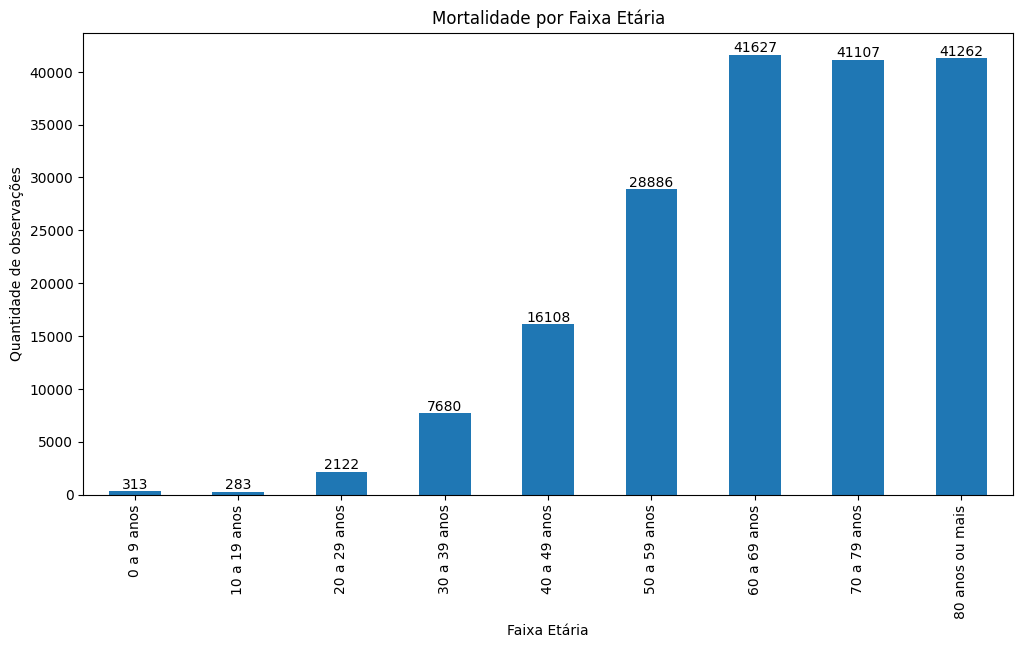

In [ ]:
# criação do gráfico de histograma para facilitar a visualização da mortalidade por faixas etárias

fig = plt.figure(figsize=(12,6))

base_faixa_etaria['Obito'].plot(kind='bar')

plt.xlabel("Faixa Etária")
plt.ylabel("Quantidade de observações")
plt.title("Mortalidade por Faixa Etária")

for posicao, valor in enumerate(base_faixa_etaria['Obito']):
    plt.annotate(str(valor), xy=(posicao, valor), ha='center', va='bottom')

plt.show()

## <center> Doença pré existente com maior presença em: <center>
### <center> 1. Pessoa sem Covid <center>
### <center> 2. Pessoa com Covid <center>
### <center> 3. Pessoa que veio a óbito <center>

In [ ]:
# Copiando o dataframe original para podermos fazer modificações nos dados

base_doencas = raw_data_covid.copy()

# drop das colunas que não são informações de doenças-pré existentes
base_doencas = base_doencas.drop(['Data_Inicio_Sintomas','Genero','Idade','Municipio','Diagnostico_Covid19'], axis=1)

base_doencas.head()

,Asma,Cardiopatia,Diabetes,Doenca_Hematologica,Doenca_Hepatica,Doenca_Neurologica,Doenca Renal,Imunodepressao,Obesidade,Obito,Outros_Fatores_De_Risco,Pneumopatia,Puérpera,Síndrome_De_Down
0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
1,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
2,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
3,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
4,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO


In [ ]:
# olhando da forma que o dado vem originalmente, não encontramos nenhum valor a ser desconsiderado, no entanto a base possui múltiplos valores "IGNORADO" que trataremos para ser um NaN
base_doencas.isnull().sum()

Asma                       0
Cardiopatia                0
Diabetes                   0
Doenca_Hematologica        0
Doenca_Hepatica            0
Doenca_Neurologica         0
Doenca Renal               0
Imunodepressao             0
Obesidade                  0
Obito                      0
Outros_Fatores_De_Risco    0
Pneumopatia                0
Puérpera                   0
Síndrome_De_Down           0
dtype: int64

In [ ]:
# alteração dos valores dentro do dataframe

base_doencas_mod = base_doencas.replace(['SIM', 'NÃO', 'IGNORADO', 'CONFIRMADO'], ['1', '0', 'NaN', '1'])

# conversão deste texto para um valor que o pandas compreenda como null

base_doencas_mod = base_doencas_mod.replace('NaN', np.nan)

In [ ]:
base_doencas_mod.head()

,Asma,Cardiopatia,Diabetes,Doenca_Hematologica,Doenca_Hepatica,Doenca_Neurologica,Doenca Renal,Imunodepressao,Obesidade,Obito,Outros_Fatores_De_Risco,Pneumopatia,Puérpera,Síndrome_De_Down
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


In [ ]:
# alterando o tipo do dado para podermos trabalhar como números
base_doencas_mod.astype('float64').head()

,Asma,Cardiopatia,Diabetes,Doenca_Hematologica,Doenca_Hepatica,Doenca_Neurologica,Doenca Renal,Imunodepressao,Obesidade,Obito,Outros_Fatores_De_Risco,Pneumopatia,Puérpera,Síndrome_De_Down
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [ ]:
# grandes problemas de preenchimento das doenças pré-existentes na ficha do paciente, únicas colunas com preenchimento completo foi "Diagnostico_Covid19" e "Obito"
base_doencas_mod.isnull().sum()

Asma                       6290878
Cardiopatia                5960201
Diabetes                   6074317
Doenca_Hematologica        6294433
Doenca_Hepatica            6295201
Doenca_Neurologica         6287912
Doenca Renal               6278250
Imunodepressao             6268272
Obesidade                  6283894
Obito                            0
Outros_Fatores_De_Risco    6245314
Pneumopatia                6288601
Puérpera                   6296324
Síndrome_De_Down           6294850
dtype: int64

In [ ]:
# agrupando os valores das doenças pré-existentes considerando a coluna 'Óbito' como index

pivot_doencas = pd.pivot_table(base_doencas_mod, index=['Obito'], aggfunc='count')

pivot_doencas

# entender a sensibilidade de doenças pré-existentes sobre óbitos e sobreviventes

NameError: ignored

In [ ]:
# selecionando a linha desejada

obitos_nao = pivot_doencas.iloc[0]
obitos_sim = pivot_doencas.iloc[1]

# gerando o total de valores preenchidos para cada doença

Total = obitos_nao + obitos_sim

# transformando os valores em dataframe

Total_df = pd.DataFrame(Total)

# ordenando os valores do dataframe acima

Total_df.sort_values(by=[0], ascending = False)

NameError: ignored

In [ ]:
## EXTRA: Caso deseje encontrar a doença com maior percentual entre os óbitos.

## definindo o valor percentual para cada doença

# obito_perc = (obitos_sim / Total) * 100

## transformando os valores em dataframe

#obito_perc_df = pd.DataFrame(obito_perc)

## ordenando os valores do dataframe do percentual de óbitos por doença

#obito_perc_df.sort_values(by=[0], ascending = False)

Resposta:

A doença pré-existente mais provável de se encontrar em um paciente com covid é a **"Cardiopatia"**.

## <center>Criação de um modelo que estime a probabilidade da pessoa vir a óbito:<center> 
## Parâmetros:
### Diagnóstico Covid: Confirmado &
### Idade, Gênero e Doenças pré-existentes

### Replicação do dataframe original e tratamento das variáveis:

In [ ]:
# inputs = 'Idade','Genero' e doenças pré existentes

abt_classificacao = raw_data_covid.copy()

# remoçãodas colunas que não serviram para nosso modelo de classificação

abt_classificacao = abt_classificacao.drop(columns=['Data_Inicio_Sintomas','Diagnostico_Covid19','Municipio'])

abt_classificacao.head()

,Asma,Cardiopatia,Diabetes,Doenca_Hematologica,Doenca_Hepatica,Doenca_Neurologica,Doenca Renal,Genero,Idade,Imunodepressao,Obesidade,Obito,Outros_Fatores_De_Risco,Pneumopatia,Puérpera,Síndrome_De_Down
0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,69.0,IGNORADO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
1,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,FEMININO,60.0,IGNORADO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
2,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,58.0,IGNORADO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
3,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,FEMININO,45.0,IGNORADO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
4,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,FEMININO,42.0,IGNORADO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO


In [ ]:
abt_classificacao_mod = abt_classificacao.replace(['SIM', 'NÃO', 'IGNORADO', 'CONFIRMADO', 'MASCULINO', 'FEMININO','INDEFINIDO'], ['1', '0', 'NaN', '1', '0', '1','NaN'])

abt_classificacao_mod = abt_classificacao_mod.replace('NaN', np.nan)

abt_classificacao_mod = abt_classificacao_mod.dropna()


In [ ]:
abt_classificacao_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197895 entries, 4034 to 6521533
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Asma                     197895 non-null  object 
 1   Cardiopatia              197895 non-null  object 
 2   Diabetes                 197895 non-null  object 
 3   Doenca_Hematologica      197895 non-null  object 
 4   Doenca_Hepatica          197895 non-null  object 
 5   Doenca_Neurologica       197895 non-null  object 
 6   Doenca Renal             197895 non-null  object 
 7   Genero                   197895 non-null  object 
 8   Idade                    197895 non-null  float64
 9   Imunodepressao           197895 non-null  object 
 10  Obesidade                197895 non-null  object 
 11  Obito                    197895 non-null  int64  
 12  Outros_Fatores_De_Risco  197895 non-null  object 
 13  Pneumopatia              197895 non-null  object 
 14  

In [ ]:
abt_classificacao_mod = abt_classificacao_mod.astype('float64')

In [ ]:
abt_classificacao_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197895 entries, 4034 to 6521533
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Asma                     197895 non-null  float64
 1   Cardiopatia              197895 non-null  float64
 2   Diabetes                 197895 non-null  float64
 3   Doenca_Hematologica      197895 non-null  float64
 4   Doenca_Hepatica          197895 non-null  float64
 5   Doenca_Neurologica       197895 non-null  float64
 6   Doenca Renal             197895 non-null  float64
 7   Genero                   197895 non-null  float64
 8   Idade                    197895 non-null  float64
 9   Imunodepressao           197895 non-null  float64
 10  Obesidade                197895 non-null  float64
 11  Obito                    197895 non-null  float64
 12  Outros_Fatores_De_Risco  197895 non-null  float64
 13  Pneumopatia              197895 non-null  float64
 14  

In [ ]:
abt_classificacao_mod.head()

,Asma,Cardiopatia,Diabetes,Doenca_Hematologica,Doenca_Hepatica,Doenca_Neurologica,Doenca Renal,Genero,Idade,Imunodepressao,Obesidade,Obito,Outros_Fatores_De_Risco,Pneumopatia,Puérpera,Síndrome_De_Down
4034,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,82.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4035,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,30.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4036,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


### Implementação do modelo de classificação

In [ ]:
# Importação das bibliotecas a serem utilizadas:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

!pip install xgboost
from xgboost import XGBClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# separação da ABT entre colunas explicativas e target (evento desejado)

explicativas = abt_classificacao_mod.drop(columns=['Obito'])

target = abt_classificacao_mod['Obito']

# utilização da lib para separação da abt de forma aleatória a parte da base de treino e a parte de validação e utilização de 30% da base para teste e evitarmos o overfitting

x_treino, x_val, y_treino, y_val = train_test_split(explicativas, target, train_size=0.7, random_state=42)

# definição e treino dos modelos

tree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

tree.fit(x_treino, y_treino)
rf.fit(x_treino, y_treino)
gb.fit(x_treino, y_treino)
xgb.fit(x_treino, y_treino);

In [ ]:
# Análise dos resultados do treino do modelo

print("Acurácia dos dados de treino do 'Decision Tree': ",accuracy_score(y_treino, tree.predict(x_treino)))
print("Acurácia dos dados de treino do 'Random Forest': ",accuracy_score(y_treino, rf.predict(x_treino)))
print("Acurácia dos dados de treino do 'Gradient Boosting': ",accuracy_score(y_treino, gb.predict(x_treino)))
print("Acurácia dos dados de treino do 'Extreme Gradient Boosting': ",accuracy_score(y_treino, xgb.predict(x_treino)))

Acurácia dos dados de treino do 'Decision Tree':  0.7012690758413583
Acurácia dos dados de treino do 'Random Forest':  0.7012329815341525
Acurácia dos dados de treino do 'Gradient Boosting':  0.6595368378499343
Acurácia dos dados de treino do 'Extreme Gradient Boosting':  0.6675353363267545


In [ ]:
# Como todos os algoritmos não overfittaram e todos apresentaram valores parecidos, 
#vamos considerar os 4 para a parte de validação

print("Acurácia dos dados de validação do 'Decision Tree': ",accuracy_score(y_val, tree.predict(x_val)))
print("Acurácia dos dados de validação do 'Random Forest': ",accuracy_score(y_val, rf.predict(x_val)))
print("Acurácia dos dados de validação do 'Gradient Boosting': ",accuracy_score(y_val, gb.predict(x_val)))
print("Acurácia dos dados de validação do 'Extreme Gradient Boosting': ",accuracy_score(y_val, xgb.predict(x_val)))

Acurácia dos dados de validação do 'Decision Tree':  0.642069093297849
Acurácia dos dados de validação do 'Random Forest':  0.6418838114167327
Acurácia dos dados de validação do 'Gradient Boosting':  0.6585254931024609
Acurácia dos dados de validação do 'Extreme Gradient Boosting':  0.6559483905742054


In [ ]:
import joblib

In [ ]:
# serialização do modelo

joblib.dump(xgb, 'modelo_treinado_XGB.pkl', compress=1)

['modelo_treinado_XGB.pkl']

In [ ]:
# considerando a representatividade de algumas variáveis explicativas, pode ser feito um Feature Selection na 
# refatoração deste Modelo para sermos mais assertivos e desconsiderarmos variáveis que explicam próximo a 0%

# xgb.feature_importances_

In [ ]:
# explicativas.columns